In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hopfield import HopfieldNetwork

In [2]:
def hopfield_recall(img_size = 256,
                    NEURONS = 256,
                    pattern_numbers = 30,
                    death_rate = 0,
                    residual_strength = 0,
                    plaque_intensity = 0,
                    plaque_rate = 0,
                    noise_level = 0.25):
    
    temp = [1, -1]
    patterns = np.array([
        np.random.choice(temp, img_size) for _ in range(pattern_numbers)
    ])

    hop = HopfieldNetwork(N=NEURONS, death_rate=death_rate, residual_strength=residual_strength, plaque_intensity=plaque_intensity, 
                        plaque_rate=plaque_rate)
    hop.train(patterns)

    success_rate = []

    for i in patterns:
        input_pattern = i
        noisy_input = hop.add_noise(input_pattern, noise_level=noise_level)
        recalled = hop.recall(noisy_input)

        while len(input_pattern) < len(recalled):
            n = int((len(input_pattern))**(0.5))
            input_pattern = np.reshape(input_pattern, (n, n))
            newer_p = np.reshape([0 for _ in range(4*n*n)], (2*n, 2*n))
            for i in range(n):
                for j in range(n):
                    newer_p[2*i][2*j] = input_pattern[i][j]
                    newer_p[2*i+1][2*j] = input_pattern[i][j]
                    newer_p[2*i][2*j+1] = input_pattern[i][j]
                    newer_p[2*i+1][2*j+1] = input_pattern[i][j]
            input_pattern = []
            for i in newer_p:
                input_pattern += list(i)
        success_rate.append(np.mean(recalled == input_pattern))
    #print("回憶成功率", success_rate)
    #print("平均回憶成功率", sum(success_rate)/len(success_rate))
    return sum(success_rate)/len(success_rate)

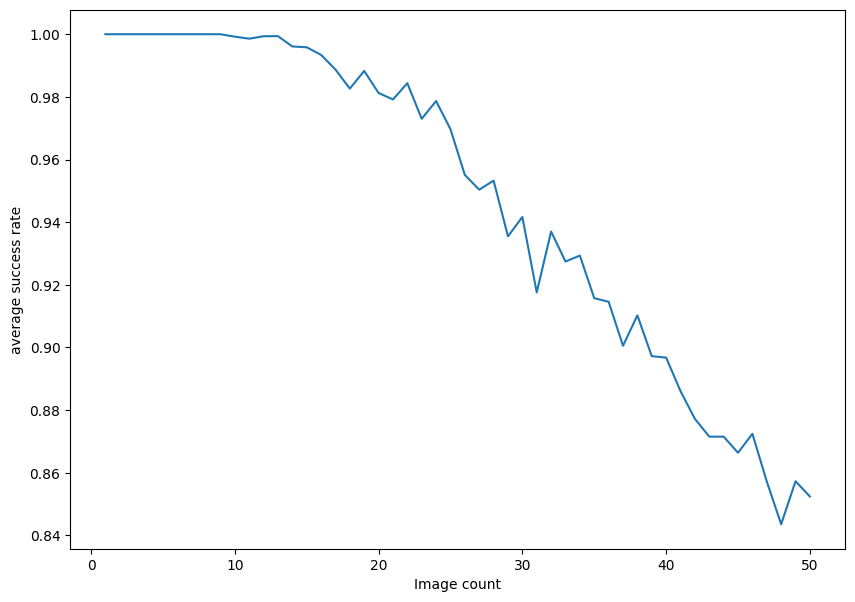

In [3]:
N = 50
rep = 1
x = np.linspace(1, N, N)
z = []
for i in range(1, N+1):
    t = hopfield_recall(pattern_numbers = i,
                        death_rate = 0,
                        residual_strength = 0,
                        plaque_intensity = 0,
                        plaque_rate = 0,
                        noise_level = 0.25)
    z.append(t)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, z)
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
plt.show()

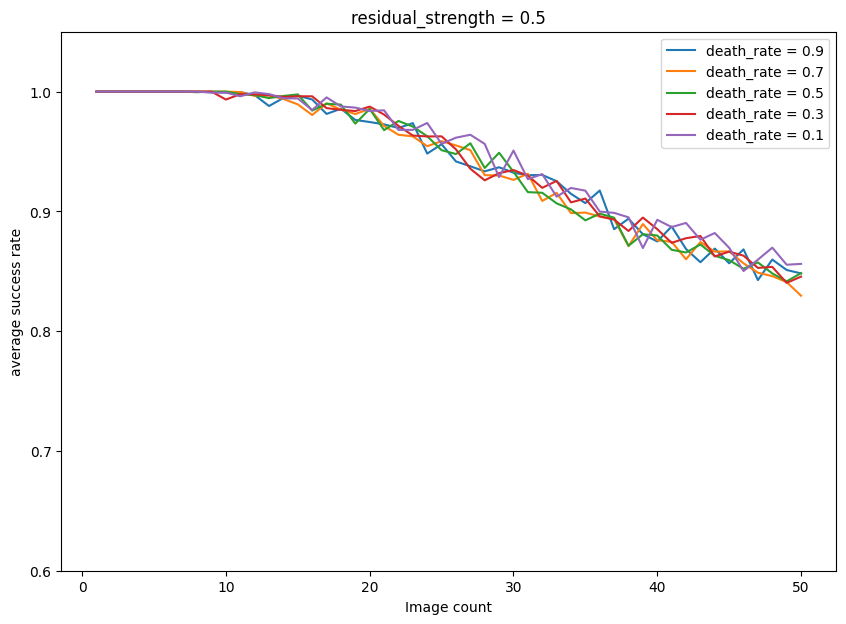

In [ ]:
N = 50
x = np.linspace(1, N, N)
dec = [0.9, 0.7, 0.5, 0.3, 0.1]
z = [[] for _ in range(5)]
for i in range(1, N+1):
    for j in range(5):
        t = hopfield_recall(pattern_numbers = i,
                            death_rate = dec[j],
                            residual_strength = 0.5,
                            plaque_intensity = 0,
                            plaque_rate = 0,
                            noise_level = 0.25)
        z[j].append(t)
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(5):
    ax.plot(x, z[i], label = "death_rate = "+str(dec[i]))
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
ax.set_title("residual_strength = 0.5")
ax.set_ylim([0.6, 1.05])
plt.legend()
plt.show()

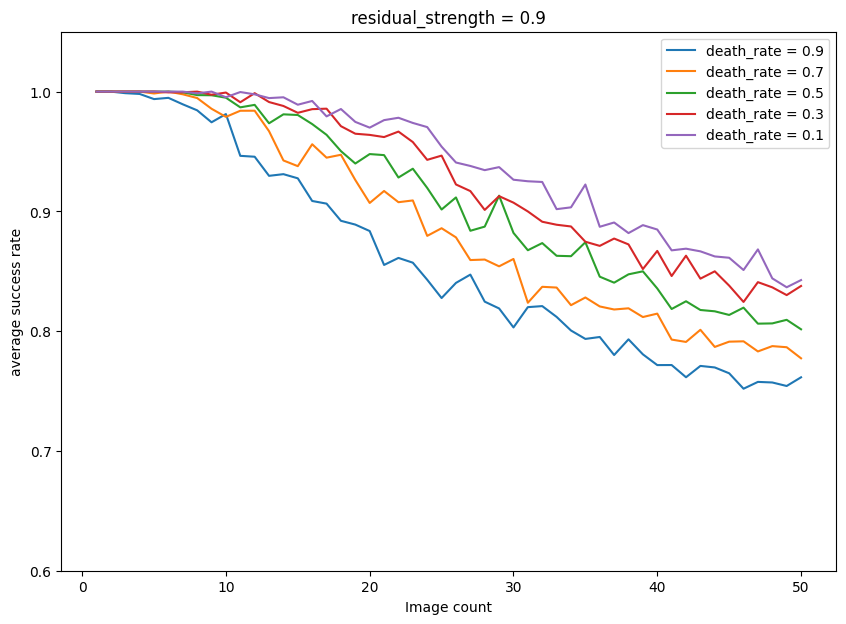

In [ ]:
N = 50
rep = 1
x = np.linspace(1, N, N)
dec = [0.9, 0.7, 0.5, 0.3, 0.1]
z = [[] for _ in range(5)]
for i in range(1, N+1):
    for j in range(5):
        t = hopfield_recall(pattern_numbers = i,
                            death_rate = dec[j],
                            residual_strength = 0.9,
                            plaque_intensity = 0,
                            plaque_rate = 0,
                            noise_level = 0.25)
        z[j].append(t)
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(5):
    ax.plot(x, z[i], label = "death_rate = "+str(dec[i]))
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
ax.set_title("residual_strength = 0.9")
ax.set_ylim([0.6, 1.05])
plt.legend()
plt.show()

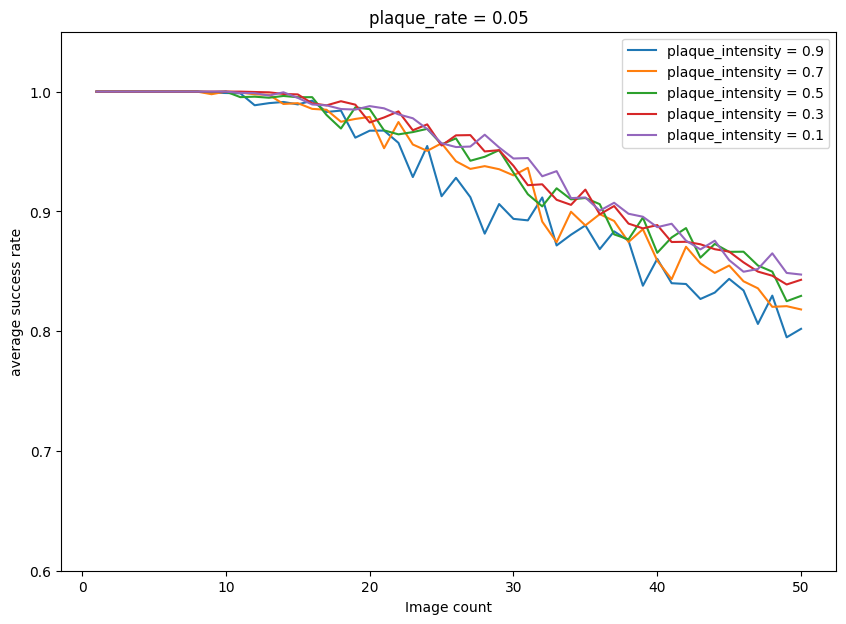

In [7]:
N = 50
rep = 1
x = np.linspace(1, N, N)
dec = [0.9, 0.7, 0.5, 0.3, 0.1]
z = [[] for _ in range(5)]
for i in range(1, N+1):
    for j in range(5):
        t = hopfield_recall(pattern_numbers = i,
                            death_rate = 0,
                            residual_strength = 0,
                            plaque_intensity = dec[j],
                            plaque_rate = 0.05,
                            noise_level = 0.25)
        z[j].append(t)
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(5):
    ax.plot(x, z[i], label = "plaque_intensity = "+str(dec[i]))
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
ax.set_title("plaque_rate = 0.05")
ax.set_ylim([0.6, 1.05])
plt.legend()
plt.show()

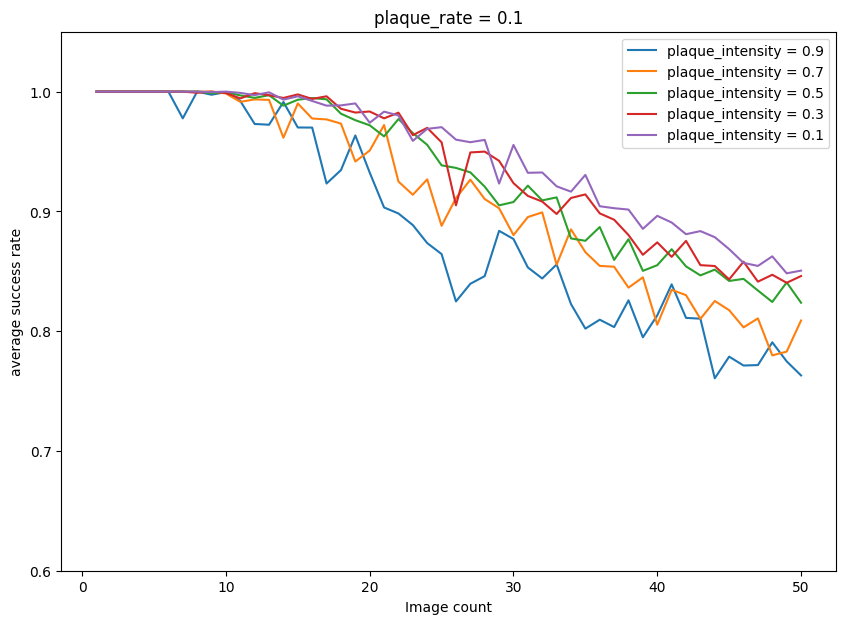

In [8]:
N = 50
rep = 1
x = np.linspace(1, N, N)
dec = [0.9, 0.7, 0.5, 0.3, 0.1]
z = [[] for _ in range(5)]
for i in range(1, N+1):
    for j in range(5):
        t = hopfield_recall(pattern_numbers = i,
                            death_rate = 0,
                            residual_strength = 0,
                            plaque_intensity = dec[j],
                            plaque_rate = 0.1,
                            noise_level = 0.25)
        z[j].append(t)
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(5):
    ax.plot(x, z[i], label = "plaque_intensity = "+str(dec[i]))
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
ax.set_title("plaque_rate = 0.1")
ax.set_ylim([0.6, 1.05])
plt.legend()
plt.show()

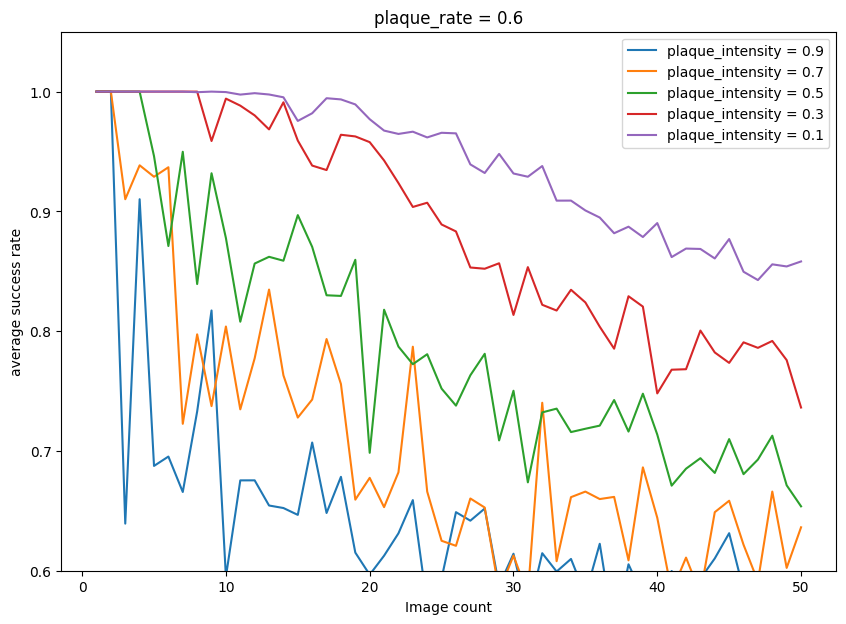

In [9]:
N = 50
rep = 1
x = np.linspace(1, N, N)
dec = [0.9, 0.7, 0.5, 0.3, 0.1]
z = [[] for _ in range(5)]
for i in range(1, N+1):
    for j in range(5):
        t = hopfield_recall(pattern_numbers = i,
                            death_rate = 0,
                            residual_strength = 0,
                            plaque_intensity = dec[j],
                            plaque_rate = 0.6,
                            noise_level = 0.25)
        z[j].append(t)
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(5):
    ax.plot(x, z[i], label = "plaque_intensity = "+str(dec[i]))
ax.set_xlabel("Image count")
ax.set_ylabel("average success rate")
ax.set_title("plaque_rate = 0.6")
ax.set_ylim([0.6, 1.05])
plt.legend()
plt.show()